## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.681581 -1.871172 -1.236879 -0.803843  0.266968 -1.322382
1  0.766569 -0.215559 -1.561032  0.422872  0.251895  1.432748
2  1.442192 -1.188137  1.642518 -0.766380 -1.748834 -0.421017
3 -1.528983 -0.583331  0.895767  0.631649 -0.830574 -0.964597
4 -1.270122  1.378274 -0.308908 -1.635529  0.858580 -1.475685


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9704182	total: 58ms	remaining: 58s
1:	learn: 0.9583184	total: 58.8ms	remaining: 29.3s
2:	learn: 0.9484853	total: 59.4ms	remaining: 19.8s
3:	learn: 0.9383580	total: 59.9ms	remaining: 14.9s
4:	learn: 0.9288574	total: 60.5ms	remaining: 12s
5:	learn: 0.9205554	total: 61ms	remaining: 10.1s
6:	learn: 0.9103175	total: 61.5ms	remaining: 8.72s
7:	learn: 0.9007044	total: 61.9ms	remaining: 7.68s
8:	learn: 0.8916499	total: 62.6ms	remaining: 6.89s
9:	learn: 0.8830747	total: 63.1ms	remaining: 6.25s
10:	learn: 0.8726826	total: 64.2ms	remaining: 5.78s
11:	learn: 0.8628794	total: 64.8ms	remaining: 5.33s
12:	learn: 0.8529412	total: 65.2ms	remaining: 4.95s
13:	learn: 0.8452827	total: 65.7ms	remaining: 4.63s
14:	learn: 0.8383641	total: 67ms	remaining: 4.4s
15:	learn: 0.8303267	total: 67.4ms	remaining: 4.15s
16:	learn: 0.8218407	total: 68ms	remaining: 3.93s
17:	learn: 0.8142844	total: 68.5ms	remaining: 3.74s
18:	learn: 0.8082176	total: 69ms	remaining: 3.56s
19:	lea

97:	learn: 0.4080010	total: 107ms	remaining: 984ms
98:	learn: 0.4047147	total: 107ms	remaining: 976ms
99:	learn: 0.4011612	total: 108ms	remaining: 969ms
100:	learn: 0.3972830	total: 108ms	remaining: 964ms
101:	learn: 0.3945429	total: 109ms	remaining: 957ms
102:	learn: 0.3913108	total: 109ms	remaining: 952ms
103:	learn: 0.3884302	total: 110ms	remaining: 947ms
104:	learn: 0.3856036	total: 110ms	remaining: 941ms
105:	learn: 0.3829178	total: 111ms	remaining: 934ms
106:	learn: 0.3797451	total: 111ms	remaining: 929ms
107:	learn: 0.3772348	total: 112ms	remaining: 923ms
108:	learn: 0.3736790	total: 112ms	remaining: 917ms
109:	learn: 0.3699974	total: 113ms	remaining: 913ms
110:	learn: 0.3671621	total: 113ms	remaining: 907ms
111:	learn: 0.3644449	total: 114ms	remaining: 902ms
112:	learn: 0.3615268	total: 114ms	remaining: 897ms
113:	learn: 0.3581582	total: 115ms	remaining: 892ms
114:	learn: 0.3556321	total: 115ms	remaining: 888ms
115:	learn: 0.3533152	total: 116ms	remaining: 883ms
116:	learn: 0.3

264:	learn: 0.1291234	total: 187ms	remaining: 517ms
265:	learn: 0.1282000	total: 187ms	remaining: 516ms
266:	learn: 0.1275338	total: 188ms	remaining: 515ms
267:	learn: 0.1268653	total: 189ms	remaining: 515ms
268:	learn: 0.1259718	total: 189ms	remaining: 514ms
269:	learn: 0.1251264	total: 190ms	remaining: 513ms
270:	learn: 0.1241337	total: 190ms	remaining: 511ms
271:	learn: 0.1236267	total: 191ms	remaining: 510ms
272:	learn: 0.1228504	total: 191ms	remaining: 509ms
273:	learn: 0.1221679	total: 191ms	remaining: 507ms
274:	learn: 0.1216253	total: 192ms	remaining: 506ms
275:	learn: 0.1206903	total: 192ms	remaining: 505ms
276:	learn: 0.1199750	total: 193ms	remaining: 504ms
277:	learn: 0.1194285	total: 194ms	remaining: 503ms
278:	learn: 0.1188599	total: 194ms	remaining: 501ms
279:	learn: 0.1182258	total: 195ms	remaining: 500ms
280:	learn: 0.1173849	total: 195ms	remaining: 499ms
281:	learn: 0.1164720	total: 196ms	remaining: 498ms
282:	learn: 0.1155852	total: 196ms	remaining: 497ms
283:	learn: 

480:	learn: 0.0495728	total: 290ms	remaining: 313ms
481:	learn: 0.0493434	total: 290ms	remaining: 312ms
482:	learn: 0.0491253	total: 291ms	remaining: 311ms
483:	learn: 0.0490018	total: 291ms	remaining: 311ms
484:	learn: 0.0488061	total: 292ms	remaining: 310ms
485:	learn: 0.0487025	total: 292ms	remaining: 309ms
486:	learn: 0.0483960	total: 293ms	remaining: 308ms
487:	learn: 0.0483450	total: 293ms	remaining: 307ms
488:	learn: 0.0480908	total: 293ms	remaining: 307ms
489:	learn: 0.0478652	total: 294ms	remaining: 306ms
490:	learn: 0.0477494	total: 294ms	remaining: 305ms
491:	learn: 0.0475435	total: 295ms	remaining: 304ms
492:	learn: 0.0474600	total: 295ms	remaining: 304ms
493:	learn: 0.0471637	total: 296ms	remaining: 303ms
494:	learn: 0.0471155	total: 296ms	remaining: 302ms
495:	learn: 0.0468982	total: 297ms	remaining: 301ms
496:	learn: 0.0468512	total: 297ms	remaining: 301ms
497:	learn: 0.0465624	total: 298ms	remaining: 300ms
498:	learn: 0.0465139	total: 298ms	remaining: 299ms
499:	learn: 

650:	learn: 0.0251011	total: 369ms	remaining: 198ms
651:	learn: 0.0249614	total: 370ms	remaining: 197ms
652:	learn: 0.0249015	total: 370ms	remaining: 197ms
653:	learn: 0.0247438	total: 371ms	remaining: 196ms
654:	learn: 0.0246203	total: 371ms	remaining: 196ms
655:	learn: 0.0244854	total: 372ms	remaining: 195ms
656:	learn: 0.0244053	total: 372ms	remaining: 194ms
657:	learn: 0.0243268	total: 373ms	remaining: 194ms
658:	learn: 0.0241678	total: 373ms	remaining: 193ms
659:	learn: 0.0240619	total: 373ms	remaining: 192ms
660:	learn: 0.0239319	total: 374ms	remaining: 192ms
661:	learn: 0.0238713	total: 374ms	remaining: 191ms
662:	learn: 0.0238116	total: 375ms	remaining: 190ms
663:	learn: 0.0236871	total: 375ms	remaining: 190ms
664:	learn: 0.0235688	total: 376ms	remaining: 189ms
665:	learn: 0.0234561	total: 376ms	remaining: 189ms
666:	learn: 0.0233554	total: 377ms	remaining: 188ms
667:	learn: 0.0232465	total: 377ms	remaining: 187ms
668:	learn: 0.0231700	total: 378ms	remaining: 187ms
669:	learn: 

865:	learn: 0.0097422	total: 473ms	remaining: 73.3ms
866:	learn: 0.0097019	total: 474ms	remaining: 72.7ms
867:	learn: 0.0096631	total: 474ms	remaining: 72.1ms
868:	learn: 0.0096204	total: 475ms	remaining: 71.6ms
869:	learn: 0.0096054	total: 476ms	remaining: 71.1ms
870:	learn: 0.0095906	total: 476ms	remaining: 70.5ms
871:	learn: 0.0095528	total: 477ms	remaining: 70ms
872:	learn: 0.0095203	total: 477ms	remaining: 69.4ms
873:	learn: 0.0094864	total: 478ms	remaining: 68.9ms
874:	learn: 0.0094596	total: 478ms	remaining: 68.3ms
875:	learn: 0.0094068	total: 479ms	remaining: 67.8ms
876:	learn: 0.0093505	total: 479ms	remaining: 67.2ms
877:	learn: 0.0093270	total: 480ms	remaining: 66.7ms
878:	learn: 0.0092897	total: 480ms	remaining: 66.1ms
879:	learn: 0.0092458	total: 481ms	remaining: 65.6ms
880:	learn: 0.0092321	total: 481ms	remaining: 65ms
881:	learn: 0.0091812	total: 482ms	remaining: 64.5ms
882:	learn: 0.0091677	total: 482ms	remaining: 63.9ms
883:	learn: 0.0091543	total: 483ms	remaining: 63.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

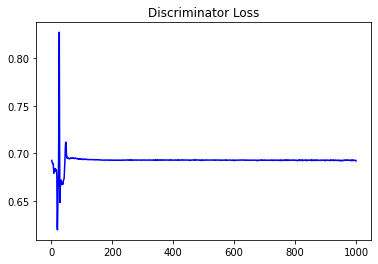

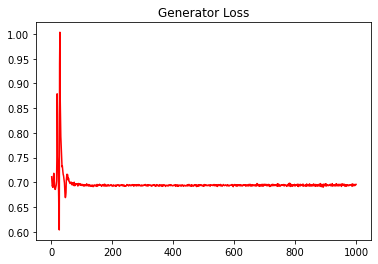

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05364202586046414


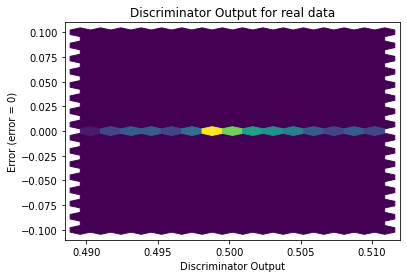

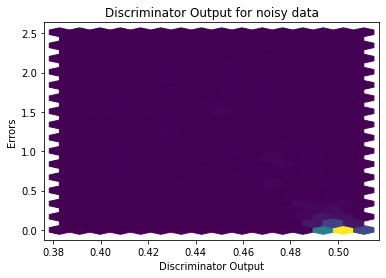

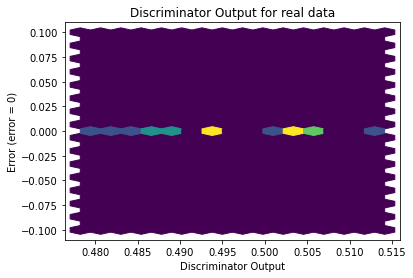

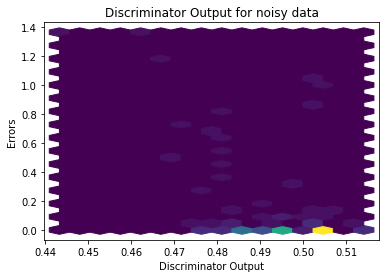

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


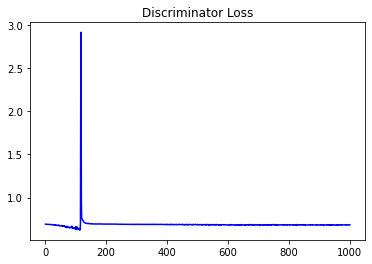

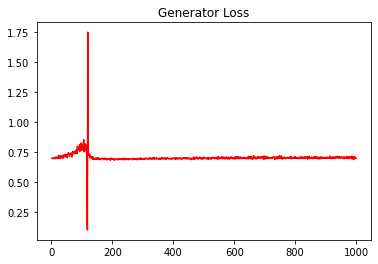

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07847959466367396


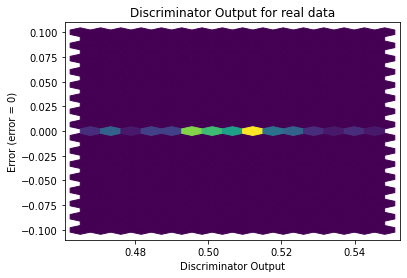

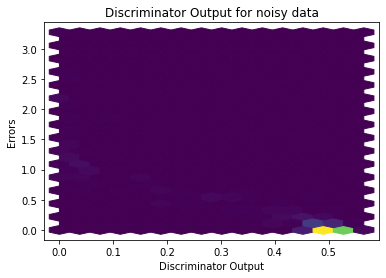

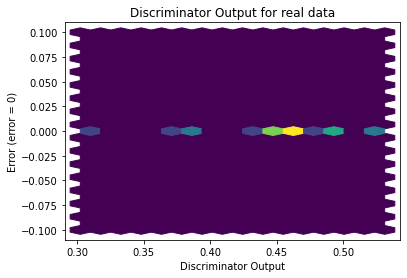

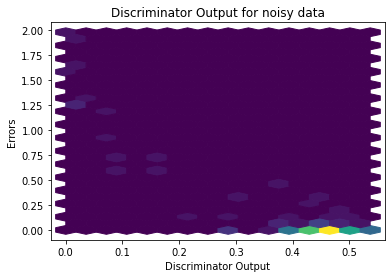

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0490]], requires_grad=True)
